In [1]:
# Step 1: Data Cleaning & Preprocessing

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Step 1: Load Dataset
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
print("Initial shape:", df.shape)


Initial shape: (23055, 41)


In [8]:
# Step 1.1: Encode 'Company' using One-Hot Encoding
if "Company" in df.columns:
    df = pd.get_dummies(df, columns=["Company"], drop_first=False)
    print("After one-hot encoding Company column:", df.shape)
else:
    print("❌ 'Company' column not found in the dataset.")


After one-hot encoding Company column: (23055, 45)


In [9]:

# Step 2: Convert Date column
df['Date'] = pd.to_datetime(df['Date'])


In [10]:

# Step 3: Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)


In [11]:

# Step 4: Select only important numeric columns for outlier removal
key_cols = ['Open', 'High', 'Low', 'Close', 'Volume']


In [8]:

# Step 5: Apply Z-score filtering only on those columns
z_scores = np.abs(stats.zscore(df[key_cols]))
df = df[(z_scores < 3).all(axis=1)]
print("After Z-score removal on key columns:", df.shape)


After Z-score removal on key columns: (20466, 41)


In [9]:

# Step 6: Apply IQR on same key columns to remove extreme outliers
Q1 = df[key_cols].quantile(0.25)
Q3 = df[key_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[key_cols] < (Q1 - 1.5 * IQR)) | (df[key_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After IQR filtering on key columns:", df.shape)


After IQR filtering on key columns: (17841, 41)


In [10]:

# Step 7: Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'


In [11]:

# Step 8: Normalize Features
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df[target].values


In [12]:

# Step 9: Train-Test Split (time-aware)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f" Training: {X_train.shape}, Testing: {X_test.shape}")


 Training: (14272, 4), Testing: (3569, 4)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load the dataset
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Clean numeric financial columns with commas or bad formats
financial_columns = ['Market Cap', 'Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
    'Total Assets', 'Total Debt', 'Total Equity', 'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA', 'Trailing Twelve Months (TTM) Earnings']

for col in financial_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Fill remaining missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# -------------------------------
# 1. Descriptive Statistics
# -------------------------------
desc_stats = df.select_dtypes(include=[np.number]).describe().T[['mean', '50%', 'std', 'min', 'max']]
desc_stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(" Descriptive Statistics:\n", desc_stats)

 Descriptive Statistics:
                                                Mean        Median  \
Open                                   9.364766e+01  3.858500e+01   
High                                   9.486310e+01  3.898300e+01   
Low                                    9.242093e+01  3.829750e+01   
Close                                  9.367227e+01  3.859850e+01   
Adj Close                              9.320657e+01  3.805078e+01   
Volume                                 1.384445e+08  5.576380e+07   
Market Cap                             1.912023e+12  2.000000e+12   
PE Ratio                               3.591245e+01  3.578995e+01   
Beta                                   1.152678e+00  1.147000e+00   
EPS                                    1.029935e+01  6.970000e+00   
Forward PE                             2.823359e+01  3.143583e+01   
Revenue                                         NaN           NaN   
Gross Profit                                    NaN           NaN   
Operatin

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load dataset
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Clean numeric financial columns with commas or missing values
financial_columns = [
    'Market Cap', 'Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
    'Total Assets', 'Total Debt', 'Total Equity',
    'Trailing Twelve Months (TTM) Revenue', 'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings'
]

# Convert financial columns to numeric (remove commas)
for col in financial_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Drop columns with 100% missing values
df.drop(columns=[
    'Revenue',
    'Gross Profit',
    'Operating Income',
    'Total Assets',
    'Total Equity',
    'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings'
], inplace=True)

# Fill remaining numeric NaNs with median
df.fillna(df.median(numeric_only=True), inplace=True)

# -------------------------------
# 1. Descriptive Statistics
# -------------------------------
desc_stats = df.select_dtypes(include=[np.number]).describe().T[['mean', '50%', 'std', 'min', 'max']]
desc_stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(" Descriptive Statistics:\n", desc_stats)

 Descriptive Statistics:
                                   Mean        Median       Std Dev  \
Open                      9.364766e+01  3.858500e+01  1.260602e+02   
High                      9.486310e+01  3.898300e+01  1.277498e+02   
Low                       9.242093e+01  3.829750e+01  1.243307e+02   
Close                     9.367227e+01  3.859850e+01  1.260690e+02   
Adj Close                 9.320657e+01  3.805078e+01  1.261236e+02   
Volume                    1.384445e+08  5.576380e+07  2.430001e+08   
Market Cap                1.912023e+12  2.000000e+12  1.084576e+12   
PE Ratio                  3.591245e+01  3.578995e+01  8.300362e+00   
Beta                      1.152678e+00  1.147000e+00  7.078544e-02   
EPS                       1.029935e+01  6.970000e+00  6.071170e+00   
Forward PE                2.823359e+01  3.143583e+01  5.725820e+00   
Net Income                5.924319e+10  5.143400e+10  3.460809e+10   
Debt to Equity            6.779647e+01  6.675600e+01  5.019640e+

In [15]:
# Drop any remaining columns with >95% nulls (or specifically)
df.drop(columns=['Cash Ratio'], inplace=True, errors='ignore')


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv(r'C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv')
df['Date'] = pd.to_datetime(df['Date'])


In [18]:

# -------------------------------
# 2. Clean Financial Columns
# -------------------------------
financial_columns = [
    'Market Cap', 'Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
    'Total Assets', 'Total Debt', 'Total Equity',
    'Trailing Twelve Months (TTM) Revenue', 'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings'
]

for col in financial_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')


In [19]:

# -------------------------------
# 3. Drop Fully-Null or Unusable Columns
# -------------------------------
df.drop(columns=[
    'Revenue',
    'Gross Profit',
    'Operating Income',
    'Total Assets',
    'Total Equity',
    'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings',
    'Cash Ratio'  # still NaN
], inplace=True, errors='ignore')


In [21]:

# -------------------------------
# 4. Handle Remaining Missing Values
# -------------------------------
df.fillna(df.median(numeric_only=True), inplace=True)


In [23]:

# -------------------------------
# 5. Descriptive Statistics
# -------------------------------
desc_stats = df.select_dtypes(include=[np.number]).describe().T[['mean', '50%', 'std', 'min', 'max']]
desc_stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(" Descriptive Statistics:\n", desc_stats)


 Descriptive Statistics:
                                   Mean        Median       Std Dev  \
Open                      9.364766e+01  3.858500e+01  1.260602e+02   
High                      9.486310e+01  3.898300e+01  1.277498e+02   
Low                       9.242093e+01  3.829750e+01  1.243307e+02   
Close                     9.367227e+01  3.859850e+01  1.260690e+02   
Adj Close                 9.320657e+01  3.805078e+01  1.261236e+02   
Volume                    1.384445e+08  5.576380e+07  2.430001e+08   
Market Cap                1.912023e+12  2.000000e+12  1.084576e+12   
PE Ratio                  3.591245e+01  3.578995e+01  8.300362e+00   
Beta                      1.152678e+00  1.147000e+00  7.078544e-02   
EPS                       1.029935e+01  6.970000e+00  6.071170e+00   
Forward PE                2.823359e+01  3.143583e+01  5.725820e+00   
Net Income                5.924319e+10  5.143400e+10  3.460809e+10   
Debt to Equity            6.779647e+01  6.675600e+01  5.019640e+

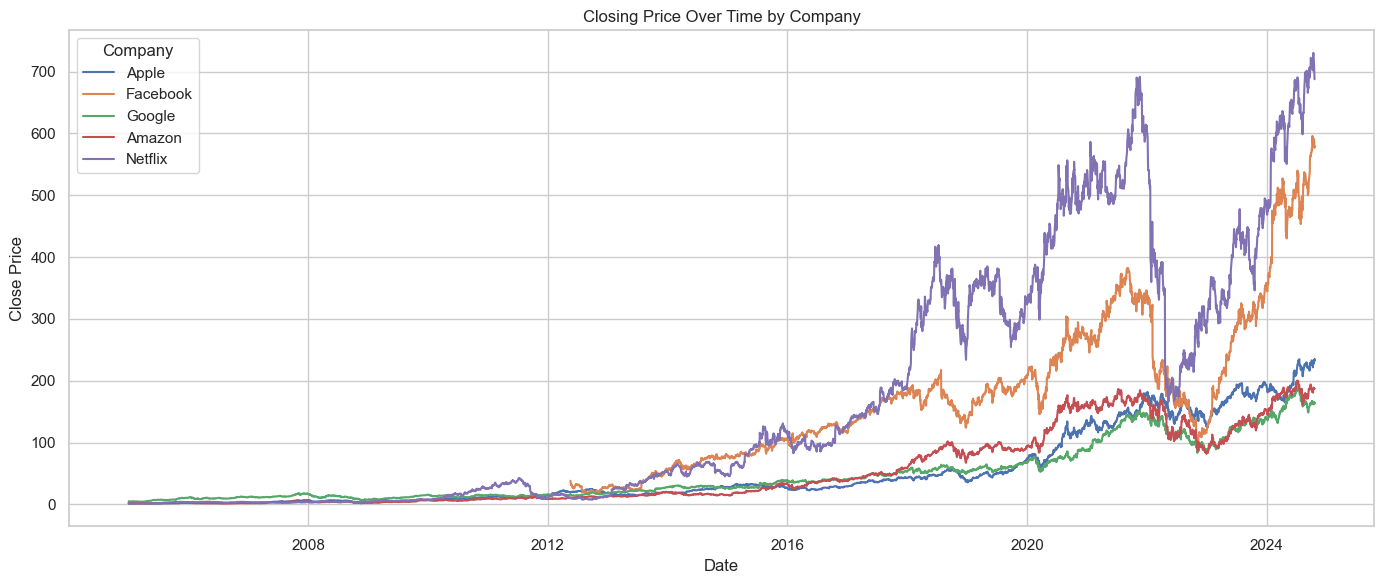

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Group and plot each company separately
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.plot(company_df['Date'], company_df['Close'], label=company)

plt.title('Closing Price Over Time by Company')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Company')  
plt.grid(True)
plt.tight_layout()
plt.show()


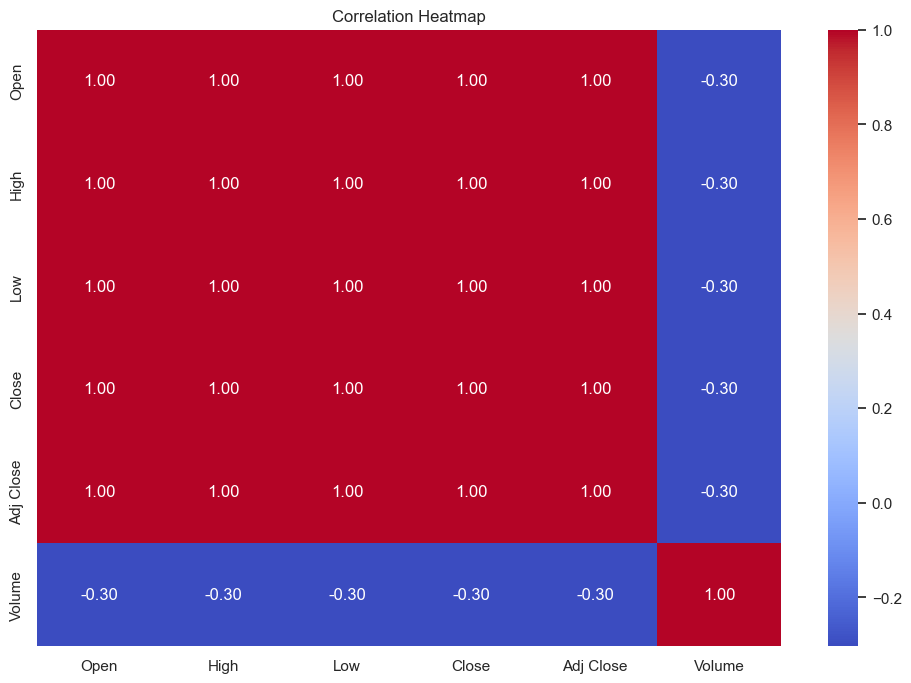

In [25]:

# Correlation Heatmap
plt.figure(figsize=(12, 8))
heatmap_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
sns.heatmap(df[heatmap_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


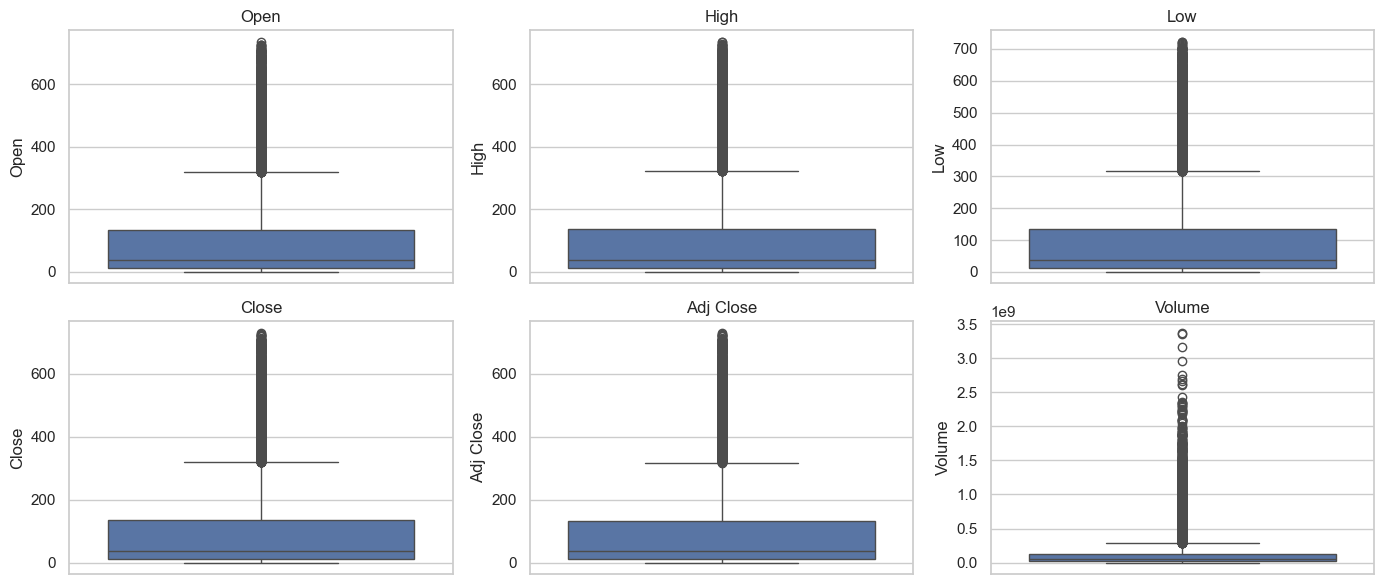

In [26]:

# Box Plots (outlier detection)
plt.figure(figsize=(14, 6))
for i, col in enumerate(heatmap_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


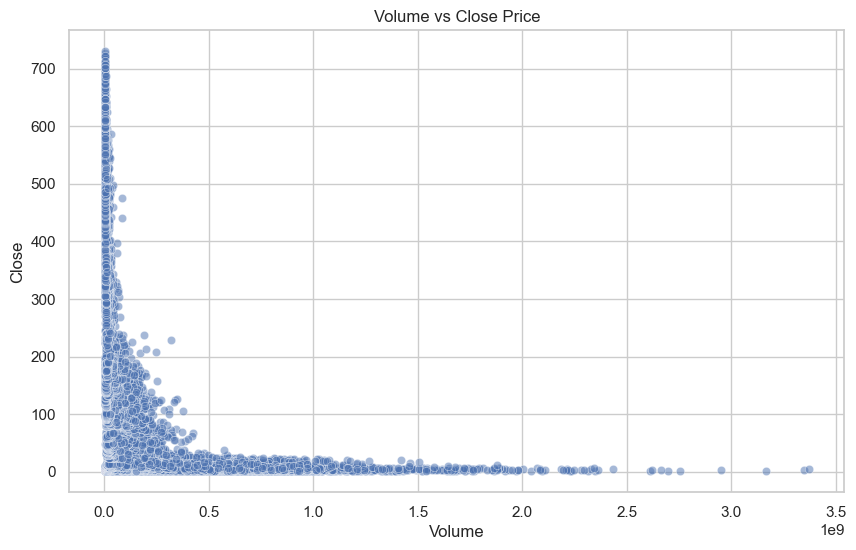

In [27]:

# Scatter Plot: Volume vs Close
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.5)
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close")
plt.grid(True)
plt.show()


In [13]:
# Feature Correlation with Close
correlation_with_close = df.corr(numeric_only=True)['Close'].sort_values(ascending=False)
print("Features correlated with Close price:\n", correlation_with_close)

# -------------------------------
# 7. Feature Selection and Scaling (Including Company Columns)
# -------------------------------
from sklearn.preprocessing import MinMaxScaler
import joblib

# Define features based on correlation
top_numeric_features = ['Open', 'High', 'Low', 'Adj Close', 'EPS', 'Target Price']
company_features = [col for col in df.columns if col.startswith("Company_")]
features = top_numeric_features + company_features
target = 'Close'

# Scale only numeric features
scaler = MinMaxScaler()
df[top_numeric_features] = scaler.fit_transform(df[top_numeric_features])
joblib.dump(scaler, "scaler.pkl")  # Save scaler

# Create final dataset
X = df[features].values
y = df[target].values


Features correlated with Close price:
 Close                                    1.000000
Adj Close                                0.999979
Low                                      0.999889
High                                     0.999887
Open                                     0.999755
EPS                                      0.456703
Target Price                             0.455472
Quarterly Revenue Growth                 0.348651
Company_Netflix                          0.315780
Annual Dividend Rate                     0.292597
Dividends Paid                           0.292597
Company_Facebook                         0.268528
Operating Margin                         0.206725
Profit Margin                            0.148618
Current Ratio                            0.145539
Quick Ratio                              0.132600
Beta                                     0.117510
Beta (5Y)                                0.117510
PE Ratio                                 0.077131
Forward PE 

In [14]:
df.drop(columns=[
    'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA',
    'Trailing Twelve Months (TTM) Earnings'
], inplace=True, errors='ignore')


In [15]:

# -------------------------------
# 8. Train-Test Split (Time-aware)
# -------------------------------
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f" X_train: {X_train.shape}, X_test: {X_test.shape}")


 X_train: (18444, 11), X_test: (4611, 11)


In [16]:
df = df.sort_values(by="Date")


In [17]:
#3. Model Development

In [18]:
#1. Imports & Setup
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [19]:
# 2. Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


In [20]:
# 3. Train and Evaluate Models
print(" Basic Evaluation of Models\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f" {name}")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R²: {r2_score(y_test, preds):.2f}")
    print("-" * 40)


 Basic Evaluation of Models

 Linear Regression
MAE: 0.35
RMSE: 0.68
R²: 1.00
----------------------------------------
 Decision Tree
MAE: 3.33
RMSE: 14.52
R²: 0.99
----------------------------------------
 Random Forest
MAE: 3.25
RMSE: 14.42
R²: 0.99
----------------------------------------
 Gradient Boosting
MAE: 3.68
RMSE: 14.40
R²: 0.99
----------------------------------------


In [21]:
# 4. Cross-Validation for Each Model
print("\n Cross-Validation Scores (5-fold RMSE):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f" {name}: RMSE = {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")


 Cross-Validation Scores (5-fold RMSE):

 Linear Regression: RMSE = 0.44 ± 0.26
 Decision Tree: RMSE = 6.45 ± 10.81
 Random Forest: RMSE = 6.40 ± 10.93
 Gradient Boosting: RMSE = 6.64 ± 10.78


In [22]:
# 5. Hyperparameter Tuning for Random Forest
print("\n Running Grid Search for Random Forest...\n")
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_


 Running Grid Search for Random Forest...



In [23]:
# 6. Evaluate the Tuned Random Forest Model
preds = best_rf.predict(X_test)
print(" Best Random Forest After Grid Search:")
print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
print(f"R²: {r2_score(y_test, preds):.2f}")
print(f" Best Parameters: {grid_search.best_params_}")

 Best Random Forest After Grid Search:
MAE: 3.22
RMSE: 14.32
R²: 0.99
 Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [24]:
#4.MLflow Integration

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
import joblib

# Set MLflow tracking URI
tracking_dir = "C:/Users/DELL/Desktop/Guvi/mlflow_logs"
mlflow.set_tracking_uri(f"file:///" + tracking_dir.replace("\\", "/"))
mlflow.set_experiment("FAANG_Stock_Regression")

# Load dataset
df = pd.read_csv("C:/Users/DELL/Desktop/Guvi/faang/FAANG - FAANG.csv.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(df.median(numeric_only=True), inplace=True)

# One-Hot Encode 'Company' if present (keep all companies including Amazon)
if "Company" in df.columns:
    df = pd.get_dummies(df, columns=["Company"], drop_first=False)

# Define features (now includes EPS and Target Price)
numeric_features = ['Open', 'High', 'Low', 'Volume', 'EPS', 'Target Price']
company_features = [col for col in df.columns if col.startswith("Company_")]
features = numeric_features + company_features
target = 'Close'

# Scale numeric features
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
joblib.dump(scaler, "scaler.pkl")

X = df[features].values
y = df[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and log models
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        mlflow.log_param("model_name", name)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)

        signature = infer_signature(X_test, preds)
        mlflow.sklearn.log_model(
            model,
            artifact_path="model",
            input_example=X_test[:2],
            signature=signature
        )

        print(f"Run '{name}' completed | MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Forcefully register Random Forest as the BEST MODEL
with mlflow.start_run(run_name="Best_Model_Forced_RF") as run:
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    mlflow.log_param("model_name", "Best_Model: Forced Random Forest")
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)

    mlflow.sklearn.log_model(
        rf_model,
        artifact_path="best_model",
        input_example=X_test[:2],
        signature=infer_signature(X_test, preds),
        registered_model_name="FAANG_Stock_Best_Model"
    )

    print(f"Forced: Random Forest registered as 'FAANG_Stock_Best_Model' | Run ID: {run.info.run_id}")

# Optionally also register it as FAANG_Random_Forest_Model
with mlflow.start_run(run_name="RandomForest_Registered") as run:
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)

    mlflow.log_param("model_name", "Random Forest")
    mlflow.log_metric("MAE", mean_absolute_error(y_test, preds))
    mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_test, preds)))
    mlflow.log_metric("R2", r2_score(y_test, preds))

    mlflow.sklearn.log_model(
        rf_model,
        artifact_path="random_forest_model",
        input_example=X_test[:2],
        signature=infer_signature(X_test, preds),
        registered_model_name="FAANG_Random_Forest_Model"
    )

    print(f"Random Forest also registered as 'FAANG_Random_Forest_Model' | Run ID: {run.info.run_id}")

# Save test data for Streamlit app
pd.DataFrame(X_test, columns=features).to_csv("X_test.csv", index=False)
pd.DataFrame(y_test, columns=["Close"]).to_csv("y_test.csv", index=False)


Run 'Linear Regression' completed | MAE: 0.52, RMSE: 1.22, R²: 0.9999
Run 'Decision Tree' completed | MAE: 0.80, RMSE: 2.01, R²: 0.9997
Run 'Random Forest' completed | MAE: 0.62, RMSE: 1.59, R²: 0.9998
Run 'Gradient Boosting' completed | MAE: 0.99, RMSE: 1.92, R²: 0.9998


Registered model 'FAANG_Stock_Best_Model' already exists. Creating a new version of this model...
Created version '15' of model 'FAANG_Stock_Best_Model'.


Forced: Random Forest registered as 'FAANG_Stock_Best_Model' | Run ID: bfd57508d75a4cd5bd33388928a14c1b
Random Forest also registered as 'FAANG_Random_Forest_Model' | Run ID: 88febd06274847f9a062eaab64022bab


Registered model 'FAANG_Random_Forest_Model' already exists. Creating a new version of this model...
Created version '11' of model 'FAANG_Random_Forest_Model'.
